<a href="https://colab.research.google.com/github/shivaallala/MachineLearning/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
%load_ext google.colab.data_table
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [14]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **Data Exploration**

In [ ]:
print(df.shape)
df.dtypes

In [ ]:
df.describe()

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns: ',cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object'] #prints the columns that are not categorical.
print('Numerical columns :', num_col)
print(df[cat_col].nunique()) #Describes the number of unique values in each column
print(df[num_col].nunique())

In [ ]:
some_data = df.iloc[0:10,[0,2,4,11,12,14]] # using Iloc to retrieve selected rows and columns
print(some_data)

In [ ]:
df.isna().sum()

In [ ]:
print(df['workclass'].value_counts())

In [6]:
EduDupes = df[['education','education.num', 'hours.per.week','income']]
EduDistinct = EduDupes.drop_duplicates(subset=['education.num']).sort_values(by='education.num') # Tells the label encoding mapping of the education level
print(EduDistinct)

         education  education.num  hours.per.week income
1106     Preschool              1              40  <=50K
26         1st-4th              2              32  <=50K
27         5th-6th              3              40  <=50K
3          7th-8th              4              40  <=50K
197            9th              5              40   >50K
6             10th              6              40  <=50K
16            11th              7              76   >50K
178           12th              8              42  <=50K
0          HS-grad              9              40  <=50K
2     Some-college             10              40  <=50K
25       Assoc-voc             11              40  <=50K
18      Assoc-acdm             12              40   >50K
12       Bachelors             13              20   >50K
13         Masters             14              55   >50K
11     Prof-school             15              45   >50K
7        Doctorate             16              20   >50K


In [85]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,gender_code
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


# Data Analysis

Text(0, 0.5, 'Age')

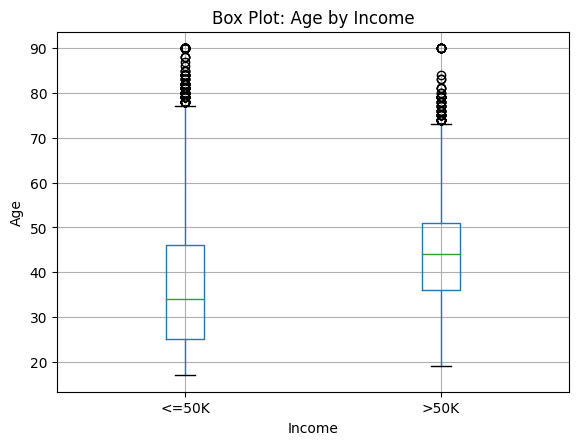

In [10]:
df.boxplot(column ='age', by = 'income')
plt.suptitle('')  # Remove the automatic title
plt.title('Box Plot: Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')

In [11]:
wc = df[['workclass','hours.per.week', 'education', 'race']]


# Data Cleaning and Transformation


In [7]:
df['income'] = df['income'].astype('category')

In [ ]:
le = LabelEncoder() #Using LabelEncoder to numerically categorize dataset 'Sex' attribute
df['gender_code'] = le.fit_transform(df['sex'])
print(df[['sex','gender_code']])

In [ ]:
print(pd.get_dummies(df['sex'])) #One-hot encoding

#ML MODELS

## Supervised Learning

In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,gender_code
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


###Logistic Regression

In [ ]:
target_variable = 'income'
df_1 = df[['age','fnlwgt','education.num','gender_code','hours.per.week','income']]
X = df_1.drop(columns = [target_variable])
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

In [ ]:
'''edu = df[['education','hours.per.week','income']]
#Setting the education level in ordinal order for the label encoder
education_level = ['Preschool', '1st-4th', '5th-6th', '7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof-school','Doctorate']
le = LabelEncoder()
le.fit(education_level)
edu['Education_label'] = le.transform(edu['education'])
edu'''

###Logistic Regression using ['Age', 'hours.per.week'], feature scaling the age and hours worked due their different range.

In [45]:
x = df.iloc[:,[0,2,12]].values
y = df.iloc[:,14].values

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print("The age and hoursworked column are changed to -3 to 2, so that one feature doesn't dominate the other: \n")
print(X_train[0:10,:])

The age and hoursworked column are changed to -3 to 2, so that one feature doesn't dominate the other: 

[[ 1.20264866  0.17027576 -0.03923011]
 [ 0.25021666 -0.13709306 -0.03923011]
 [ 0.25021666 -0.49784206 -0.03923011]
 [-0.99527134  0.36503822 -0.03923011]
 [ 1.56896867 -0.7867364  -0.03923011]
 [ 1.05612066 -1.01439914 -0.03923011]
 [ 0.76306466  0.05609912 -0.03923011]
 [-1.50811934  0.58558738 -2.06717095]
 [ 0.61653666 -1.03805745 -0.03923011]
 [-0.40915934 -0.12588351 -0.03923011]]


In [46]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_pred,'\n')

cm = confusion_matrix(y_test, y_pred)
print("confusion Matric: \n",cm,'\n')
print('Accuracy of the model: \n', accuracy_score(y_test,y_pred))

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K'] 

confusion Matric: 
 [[5954  239]
 [1757  191]] 

Accuracy of the model: 
 0.7548212750276379


###Decision Tree